[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/jlfvindel/SW-KG/blob/main/Grafos_RDF/Tablas_a_Grafos.ipynb)

## Resumen de este cuaderno
+ **Datos a DataFrame**. Se parte de datos con una estructura tabular, en cualquiera de los formatos que pueden [importarse a un DataFrame](https://pandas.pydata.org/docs/reference/io.html) de [Pandas](https://pandas.pydata.org/docs/getting_started/index.html).
+ **DataFrame a tripletas**. Este DataFrame, con N columnas, se reconfigura como un DataFrame de 3 columnas, que recoge las relaciones individuales `<sujeto><predicado><objeto`.
+ **Tripletas a grafo Networkx**. Con las ternas o tripletas anteriores se genera un grafo [Networkx](https://networkx.org/documentation/stable/tutorial.html), para su **visualización** con [Matplotlib](https://matplotlib.org) y con [Pygraphviz](https://pygraphviz.github.io/documentation/stable/). Adicionalmente se inserta alguna referencia a las facilidades de **análisis** de grafos de networks, que es el objetivo principal del paquete.

## Datos a DataFrame

In [1]:
#!pip install pandas
import pandas as pd

Se puede partir de datos con un estructura tabular, en cualquiera de los [formatos importables como un DataFrame](https://pandas.pydata.org/docs/reference/io.html) de Pandas.

In [2]:
datos = [ 
    {'nombre':'Marcos', 'año_nacimiento':'1962', 'lugar_nacimiento':'Salamanca', 'tiene_madre':'Belén', 'tiene_padre':'Ángel'},
    {'nombre':'Arturo', 'año_nacimiento':'1966', 'lugar_nacimiento':'Salamanca', 'tiene_madre':'Belén', 'tiene_padre':'Ángel'},
    {'nombre':'Pedro', 'año_nacimiento':'1979', 'lugar_nacimiento':'Badajoz', 'tiene_madre':'Inés', 'tiene_padre':'Pablo'},
    {'nombre':'Luis', 'año_nacimiento':'1984', 'lugar_nacimiento':'Madrid', 'tiene_madre':'Isabel', 'tiene_padre':'Jorge'},
    {'nombre':'Ana', 'año_nacimiento':'1982', 'lugar_nacimiento':'Madrid', 'tiene_madre':'Isabel', 'tiene_padre':'Jorge'},
    {'nombre':'Sonia', 'año_nacimiento':'1980', 'lugar_nacimiento':'Valencia', 'tiene_madre':'María', 'tiene_padre':'Fernando'},
    {'nombre':'Begoña', 'año_nacimiento':'2010', 'lugar_nacimiento':'Madrid', 'tiene_madre':'Sonia', 'tiene_padre':'Pedro'},
    {'nombre':'Marta', 'año_nacimiento':'2015', 'lugar_nacimiento':'Soria', 'tiene_madre':'Ana', 'tiene_padre':'Arturo'},
    {'nombre':'Juan', 'año_nacimiento':'2020', 'lugar_nacimiento':'Teruel', 'tiene_madre':'Ana', 'tiene_padre':'Pedro'} ]


In [3]:
df_in = pd.DataFrame(datos)
df_in

,nombre,año_nacimiento,lugar_nacimiento,tiene_madre,tiene_padre
0,Marcos,1962,Salamanca,Belén,Ángel
1,Arturo,1966,Salamanca,Belén,Ángel
2,Pedro,1979,Badajoz,Inés,Pablo
3,Luis,1984,Madrid,Isabel,Jorge
4,Ana,1982,Madrid,Isabel,Jorge
5,Sonia,1980,Valencia,María,Fernando
6,Begoña,2010,Madrid,Sonia,Pedro
7,Marta,2015,Soria,Ana,Arturo
8,Juan,2020,Teruel,Ana,Pedro


## DataFrame a tripletas

En el camino hacia grafos, se puede reescribir esta tabla como una colección de tripletas del estilo:
+ (Marcos, año_nacimiento, 1962)
+ (Marcos, lugar_nacimiento, Salamanca)
+ (Marcos, tiene_madre, Belén)
+ (Marcos, tiene_padre, Ángel)

In [4]:
def dfN_to_df3(dfN):
    tmp_dfs = []
    cabeceras_dfN = dfN.columns.values.tolist()
    sujeto = cabeceras_dfN[0]

    for cabecera in cabeceras_dfN[1:]:
        n = cabeceras_dfN.index(cabecera)
        tmp_dfs.append(pd.DataFrame({'from': dfN[sujeto],'label': cabecera, 'to': dfN[cabecera]}))
    df3 = pd.concat(tmp_dfs).drop_duplicates()
    return(df3)

df3 = dfN_to_df3(df_in)
df3

,from,label,to
0,Marcos,año_nacimiento,1962
1,Arturo,año_nacimiento,1966
2,Pedro,año_nacimiento,1979
3,Luis,año_nacimiento,1984
4,Ana,año_nacimiento,1982
5,Sonia,año_nacimiento,1980
6,Begoña,año_nacimiento,2010
7,Marta,año_nacimiento,2015
8,Juan,año_nacimiento,2020
0,Marcos,lugar_nacimiento,Salamanca


Las filas de esta tabla pueden definir un digrafo (o multidigrafo) donde la relación del nodo en 'from' con el nodo en 'to' se etiquetaría con el literal en 'label'.

Este grafo no es todavía un grafo RDF porque habría que añadir identificadores universales IRIs a los nodos y propiedades (a las relaciones entre ellos) para que pudieran ser referenciados externamente. Y tampoco hay una semántica diferencial de unos nodos respecto a otros.

Pero, una parte de la información de interés de un (futuro) grafo RDF se encuentra en la propia estructura del grafo. Y para el análisis estructural de grafos hay diversos paquetes disponibles. El paquete [networkx](https://networkx.org/documentation/stable/tutorial.html) es el más utilizado.

## Tripletas a grafo Networkx

### Visualización del grafo

#### Con Matplotlib

In [5]:
#!pip install networkx
import networkx as nx
import matplotlib.pyplot as plt

Se crea un digrafo G mediante networkx. Y para cada fila de la tabla de ternas se añaden nodos y ejes al grafo de la forma siguiente:
1. G.add_node('Marcos')
2. G.add_node('Salamanca')
3. G.add_edge('Marcos','Salamanca',etiqueta='lugar de nacimiento')

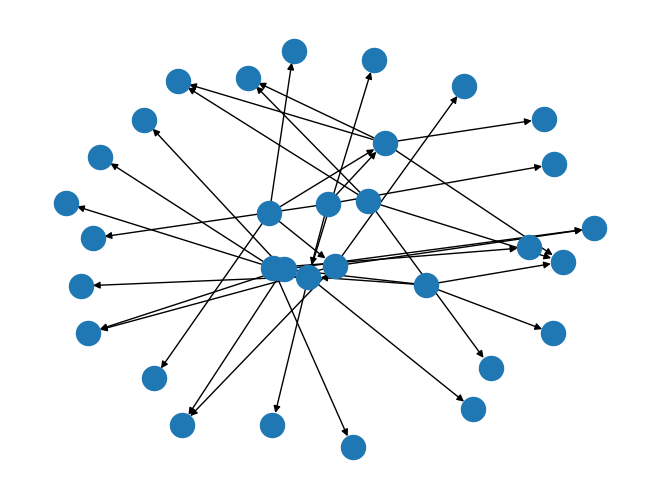

In [6]:
def df3_to_nxGraph(df3):
    G = nx.DiGraph()
    for i in range(len(df3)):
        G.add_node(df3.iloc[i, 0])
        G.add_node(df3.iloc[i, 2])
        G.add_edge(df3.iloc[i, 0], df3.iloc[i, 2], etiqueta=df3.iloc[i,1])
    return G

G = df3_to_nxGraph(df3)
nx.draw(G)

#### Con Pygraphviz

In [16]:
!apt install libgraphviz-dev
!pip install pygraphviz
import pygraphviz as pgv

In [8]:
A = nx.nx_agraph.to_agraph(G)

In [9]:
print(A.string())

strict digraph "" {
	Marcos -> 1962	[etiqueta=año_nacimiento];
	Marcos -> Salamanca	[etiqueta=lugar_nacimiento];
	Marcos -> Belén	[etiqueta=tiene_madre];
	Marcos -> Ángel	[etiqueta=tiene_padre];
	Arturo -> 1966	[etiqueta=año_nacimiento];
	Arturo -> Salamanca	[etiqueta=lugar_nacimiento];
	Arturo -> Belén	[etiqueta=tiene_madre];
	Arturo -> Ángel	[etiqueta=tiene_padre];
	Pedro -> 1979	[etiqueta=año_nacimiento];
	Pedro -> Badajoz	[etiqueta=lugar_nacimiento];
	Pedro -> Inés	[etiqueta=tiene_madre];
	Pedro -> Pablo	[etiqueta=tiene_padre];
	Luis -> 1984	[etiqueta=año_nacimiento];
	Luis -> Madrid	[etiqueta=lugar_nacimiento];
	Luis -> Isabel	[etiqueta=tiene_madre];
	Luis -> Jorge	[etiqueta=tiene_padre];
	Ana -> 1982	[etiqueta=año_nacimiento];
	Ana -> Madrid	[etiqueta=lugar_nacimiento];
	Ana -> Isabel	[etiqueta=tiene_madre];
	Ana -> Jorge	[etiqueta=tiene_padre];
	Sonia -> 1980	[etiqueta=año_nacimiento];
	Sonia -> Valencia	[etiqueta=lugar_nacimiento];
	Sonia -> María	[etiqueta=tiene_madre];
	Sonia

In [10]:
import io
from IPython.display import display, Image

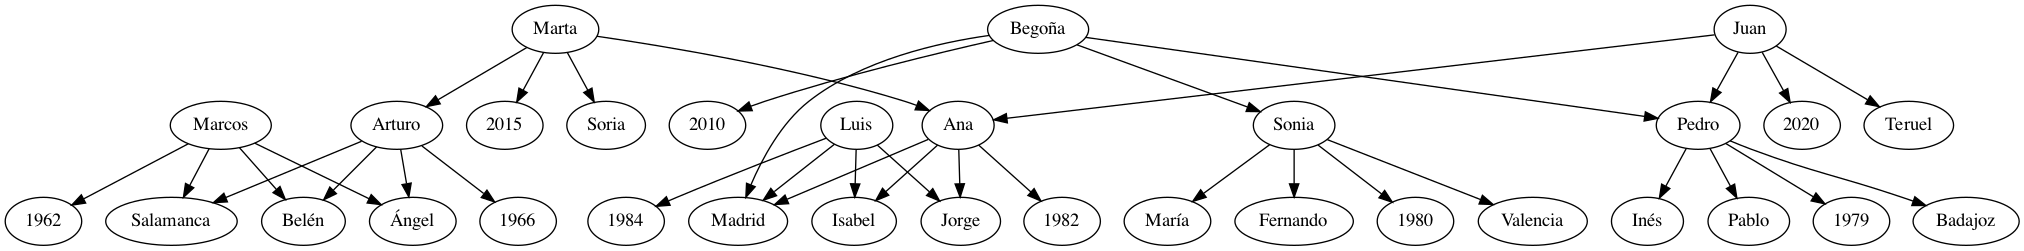

In [11]:
def visualiza(G):
    H2 = io.BytesIO(A.draw(path=None, format='png', prog='dot'))
    display(Image(data=H2.getvalue(), format='png'))

visualiza(G)

### Análisis del grafo

#### Navegación por el grafo
El [tutorial sobre networks](https://networkx.org/documentation/stable/tutorial.html) enumera los iteradores que facilitan el recorrido por los nodos y por los arcos, así como subgrafos inducidos por un conjunto de nodos o de arcos y vistas filtradas del grafo. También propiedades de los nodos, como son sus grados de entrada y salida o el listado de sus sucesores.

In [12]:
print(f'Nodos: {list(G.nodes())}')

Nodos: ['Marcos', '1962', 'Arturo', '1966', 'Pedro', '1979', 'Luis', '1984', 'Ana', '1982', 'Sonia', '1980', 'Begoña', '2010', 'Marta', '2015', 'Juan', '2020', 'Salamanca', 'Badajoz', 'Madrid', 'Valencia', 'Soria', 'Teruel', 'Belén', 'Inés', 'Isabel', 'María', 'Ángel', 'Pablo', 'Jorge', 'Fernando']


In [13]:
print(f'Arcos: {list(G.edges())}')

Arcos: [('Marcos', '1962'), ('Marcos', 'Salamanca'), ('Marcos', 'Belén'), ('Marcos', 'Ángel'), ('Arturo', '1966'), ('Arturo', 'Salamanca'), ('Arturo', 'Belén'), ('Arturo', 'Ángel'), ('Pedro', '1979'), ('Pedro', 'Badajoz'), ('Pedro', 'Inés'), ('Pedro', 'Pablo'), ('Luis', '1984'), ('Luis', 'Madrid'), ('Luis', 'Isabel'), ('Luis', 'Jorge'), ('Ana', '1982'), ('Ana', 'Madrid'), ('Ana', 'Isabel'), ('Ana', 'Jorge'), ('Sonia', '1980'), ('Sonia', 'Valencia'), ('Sonia', 'María'), ('Sonia', 'Fernando'), ('Begoña', '2010'), ('Begoña', 'Madrid'), ('Begoña', 'Sonia'), ('Begoña', 'Pedro'), ('Marta', '2015'), ('Marta', 'Soria'), ('Marta', 'Ana'), ('Marta', 'Arturo'), ('Juan', '2020'), ('Juan', 'Teruel'), ('Juan', 'Ana'), ('Juan', 'Pedro')]


In [14]:
for n in G.nodes():
    print(f'{n}: grado de entrada {G.in_degree[n]}, grado de salida {G.out_degree[n]}, sucesores {list(G.successors(n))}\n')

Marcos: grado de entrada 0, grado de salida 4, sucesores ['1962', 'Salamanca', 'Belén', 'Ángel']

1962: grado de entrada 1, grado de salida 0, sucesores []

Arturo: grado de entrada 1, grado de salida 4, sucesores ['1966', 'Salamanca', 'Belén', 'Ángel']

1966: grado de entrada 1, grado de salida 0, sucesores []

Pedro: grado de entrada 2, grado de salida 4, sucesores ['1979', 'Badajoz', 'Inés', 'Pablo']

1979: grado de entrada 1, grado de salida 0, sucesores []

Luis: grado de entrada 0, grado de salida 4, sucesores ['1984', 'Madrid', 'Isabel', 'Jorge']

1984: grado de entrada 1, grado de salida 0, sucesores []

Ana: grado de entrada 2, grado de salida 4, sucesores ['1982', 'Madrid', 'Isabel', 'Jorge']

1982: grado de entrada 1, grado de salida 0, sucesores []

Sonia: grado de entrada 1, grado de salida 4, sucesores ['1980', 'Valencia', 'María', 'Fernando']

1980: grado de entrada 1, grado de salida 0, sucesores []

Begoña: grado de entrada 0, grado de salida 4, sucesores ['2010', 'Mad

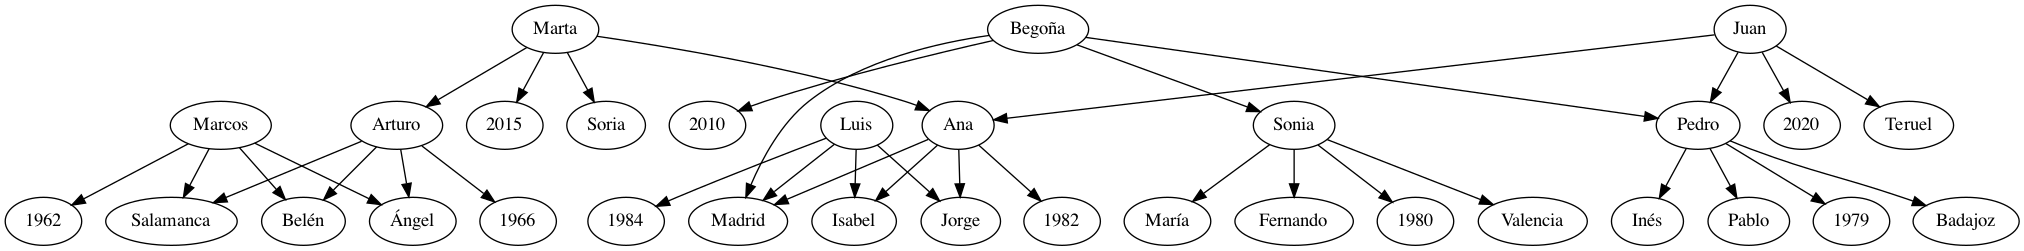

In [15]:
Gsub = nx.subgraph(G,['Fernando','Pablo'])
visualiza(Gsub)

#### Extracción de características

Networkx facilita un enorme número de [algoritmos de análisis](https://networkx.org/documentation/stable/reference/algorithms/index.html) de grafos.